<hr><h3><b>CLUSTERING (PHASE 3)

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('Preprocess_MovieDataset.csv')
data.head()

,title,cast,budget,genres,keywords,original_title,overview,popularity,production_companies,production_countries,year,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,Avatar,"GiovanniRibisi, CCHPounder, LazAlonso, ZoeSald...",237000000,"Fantasy, Adventure, ScienceFiction, Action","futuristic, cultureclash, spacewar, society, f...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"DuneEntertainment, TwentiethCenturyFoxFilmCorp...","UnitedStatesofAmerica, UnitedKingdom",2009,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,7.2,11800
1,Pirates of the Caribbean: At World's End,"JohnnyDepp, ChowYun-fat, StellanSkarsgård, Kei...",300000000,"Adventure, Action, Fantasy","eastindiatradingcompany, drugabuse, alliance, ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"SecondMateProductions, WaltDisneyPictures, Jer...",UnitedStatesofAmerica,2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500
2,Spectre,"LéaSeydoux, AndrewScott, RoryKinnear, DaveBaut...",245000000,"Adventure, Crime, Action","secretagent, sequel, britishsecretservice, mi6...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Danjaq, ColumbiaPictures, B24","UnitedKingdom, UnitedStatesofAmerica",2015,880674609,148.0,"Italiano, Deutsch, English, Español, Français",Released,A Plan No One Escapes,6.3,4466
3,The Dark Knight Rises,"GaryOldman, MarionCotillard, TomHardy, JunoTem...",250000000,"Thriller, Drama, Crime, Action","vigilante, timebomb, burglar, gothamcity, dcco...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"WarnerBros., LegendaryPictures, DCEntertainmen...",UnitedStatesofAmerica,2012,1084939099,165.0,English,Released,The Legend Ends,7.6,9106
4,John Carter,"SamanthaMorton, CiaránHinds, JamesPurefoy, Tho...",260000000,"Adventure, ScienceFiction, Action","medallion, princess, edgarriceburroughs, based...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012,284139100,132.0,English,Released,"Lost in our world, found in another.",6.1,2124


In [23]:
new_data = data[['genres', 'vote_average']] #---select the features to answer specified problem
new_data.tail()

,genres,vote_average
4804,"Thriller, Crime, Action",6.6
4805,"Romance, Comedy",5.9
4806,"Romance, Drama, Comedy, TVMovie",7.0
4807,NaN,5.7
4808,Documentary,6.3


In [24]:
# -------------------drop null values in the new dataset
new_data.dropna(axis= 0, inplace= True)

In [25]:
new_data

,genres,vote_average
0,"Fantasy, Adventure, ScienceFiction, Action",7.2
1,"Adventure, Action, Fantasy",6.9
2,"Adventure, Crime, Action",6.3
3,"Thriller, Drama, Crime, Action",7.6
4,"Adventure, ScienceFiction, Action",6.1
...,...,...
4803,"Thriller, Foreign",7.5
4804,"Thriller, Crime, Action",6.6
4805,"Romance, Comedy",5.9
4806,"Romance, Drama, Comedy, TVMovie",7.0


In [31]:
from sklearn.cluster import KMeans #----------------instantiating the km library
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

# Encode genres using one-hot encoding
genres_data = new_data['genres'].str.get_dummies(sep=', ')

# Concatenate encoded genres with the vote_average column
encoded_data = pd.concat([genres_data, new_data['vote_average']], axis=1)

# scaling the budget feature
scaler = StandardScaler()
encoded_data['vote_average'] = scaler.fit_transform(encoded_data[['vote_average']])
encoded_data.head()



,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,vote_average
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.952243
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.689068
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.162716
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1.303144
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-0.012734


In [28]:
encoded_data.value_counts()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  Fantasy  Foreign  History  Horror  Music  Mystery  Romance  ScienceFiction  TVMovie  Thriller  War  Western  vote_average
0       0          0          0       0      0            1      0       0        0        0        0       0      0        0        0               0        0         0    0         0.776793       31
                                                                                                                                                                                       0.601342       25
                                                                                                                                                                                       0.513617       22
                              1       0      0            0      0       0        0        0        0       0      0        0        0               0        0         0    0        -0.188184       19
 

In [29]:
encoded_data

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,vote_average
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.952243
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.689068
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.162716
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1.303144
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-0.012734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1.215419
4804,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.425892
4805,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.188184
4806,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0.776793


In [36]:
# ------------assigining 12 cluster points to the dataset
if 'cluster_label' in encoded_data.columns:
    features = encoded_data.drop('cluster_label', axis=1)
else:
    features = encoded_data

# Perform KMeans clustering with 25 clusters
km = KMeans(n_clusters=12, random_state=42) #------------instantiate the number of clusters
km.fit(features)

# Add cluster labels to the DataFrame
encoded_data['cluster_label'] = km.labels_

# Print the cluster assignment for each data point along with genres and vote_average
print(encoded_data[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                    'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'Horror', 'Music', 'Mystery', 'Romance', 
                    'ScienceFiction', 'TVMovie', 'Thriller', 
                    'War', 'Western', 'vote_average', 'cluster_label']])


      Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          1          1          0       0      0            0      0       0   
1          1          1          0       0      0            0      0       0   
2          1          1          0       0      1            0      0       0   
3          1          0          0       0      1            0      1       0   
4          1          1          0       0      0            0      0       0   
...      ...        ...        ...     ...    ...          ...    ...     ...   
4803       0          0          0       0      0            0      0       0   
4804       1          0          0       0      1            0      0       0   
4805       0          0          0       1      0            0      0       0   
4806       0          0          0       1      0            0      1       0   
4808       0          0          0       0      0            1      0       0   

      Fantasy  Foreign  ...

In [37]:
encoded_data.cluster_label.unique() #----------confirm the number of clusters

array([ 7, 10, 11,  8,  1,  3,  6,  2,  0,  5,  4,  9])

In [38]:
encoded_data.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller', 'War',
       'Western', 'vote_average', 'cluster_label'],
      dtype='object')

<hr><li>note:- the t-distributed Stochastic Neighbor Embedding (t-SNE) is a popular technique for dimensionality reduction that is particularly useful for visualizing high-dimensional data in a lower-dimensional space, often 2D or 3D. It aims to preserve the local structure of the data points while embedding them in a lower-dimensional space.</li> 

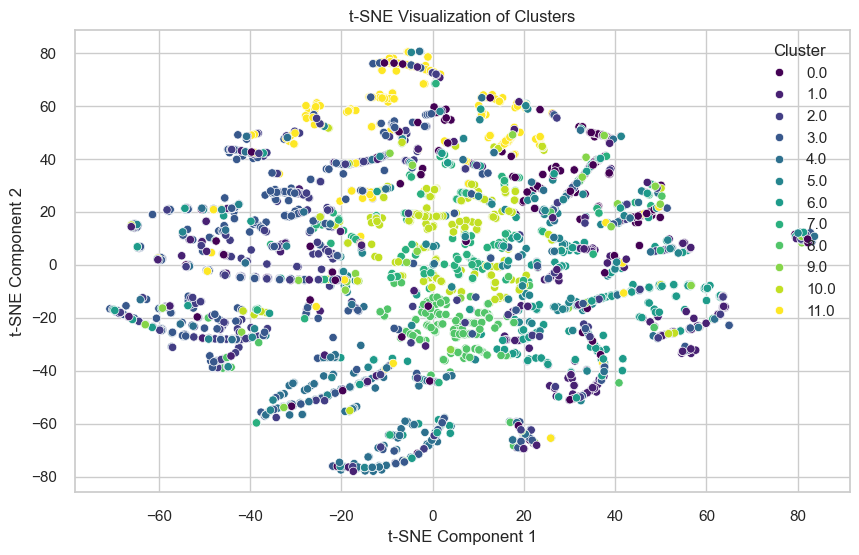

In [39]:
from sklearn.manifold import TSNE

# Create a t-SNE model to reduce the dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)

# Fit the t-SNE model to your data
tsne_data = tsne.fit_transform(encoded_data.drop('cluster_label', axis=1))

# Add the cluster labels to the t-SNE reduced data
tsne_df = pd.DataFrame(data=tsne_data, columns=['t-SNE1', 't-SNE2'])
tsne_df['cluster_label'] = encoded_data['cluster_label']

# Set style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot the clusters using t-SNE reduced data
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='cluster_label', palette='viridis', legend='full')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

<hr><h3><b>HIERARCHICHAL CLUSTERING

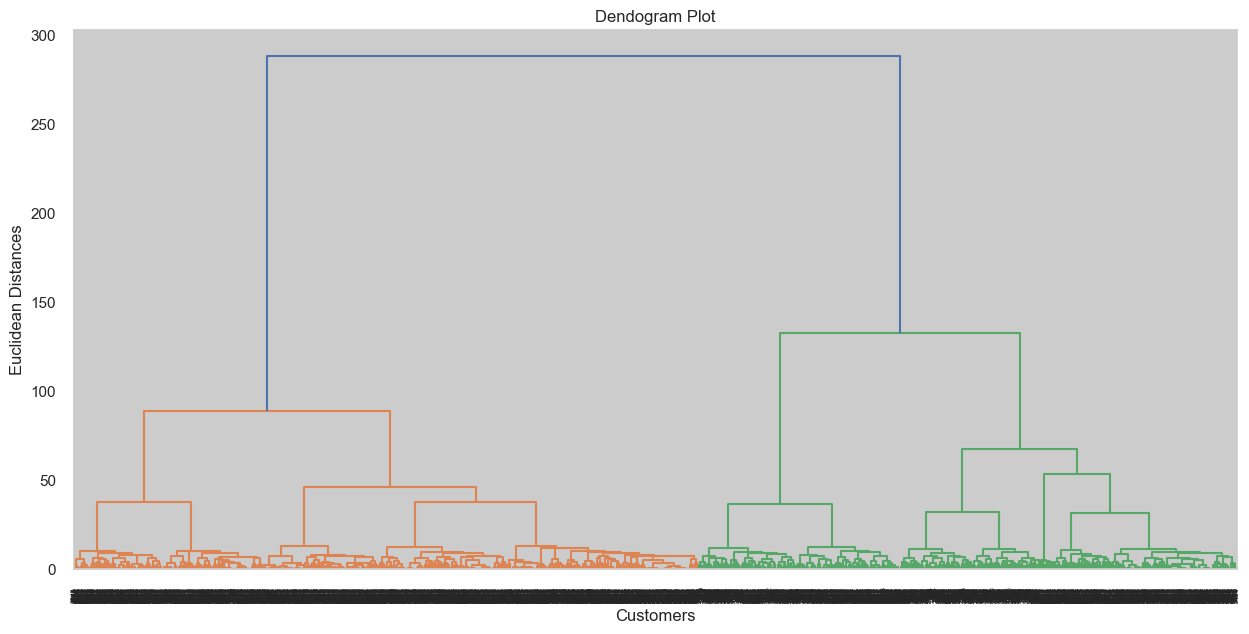

In [40]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize= (15,7))

dt = encoded_data.copy()
dendro = shc.dendrogram(shc.linkage(dt, method="ward"))
plt.title("Dendogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

<hr><b><li>USING PCA AND 25 NUMBERS OF CLUSTERS TO PERFORM SECOND CLUSTERING

<hr>Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that aims to transform high-dimensional data into a lower-dimensional space while preserving most of the variance in the original data. It does so by finding the principal components, which are the orthogonal directions that capture the maximum variance in the data.

In [41]:
data.columns

Index(['title', 'cast', 'budget', 'genres', 'keywords', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'year', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count'],
      dtype='object')

In [42]:
from sklearn.decomposition import PCA #-------------import the PCA algorithim to perform clustering

new_data2 = data[['genres', 'revenue']]
new_data2.head()

,genres,revenue
0,"Fantasy, Adventure, ScienceFiction, Action",2787965087
1,"Adventure, Action, Fantasy",961000000
2,"Adventure, Crime, Action",880674609
3,"Thriller, Drama, Crime, Action",1084939099
4,"Adventure, ScienceFiction, Action",284139100


In [45]:
# Encode genres using one-hot encoding
genres_dt2 = new_data2['genres'].str.get_dummies(sep=', ')

# Concatenate encoded genres with the revenue column
encoded = pd.concat([genres_dt2, new_data2['revenue']], axis=1)

# scaling the budget feature
scaler = StandardScaler()
encoded['revenue'] = scaler.fit_transform(encoded[['revenue']])
encoded.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,revenue
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,16.617582
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.396879
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.903544
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,6.158078
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.239791


In [46]:
encoded.isnull().sum() #--------check for null values

Action            0
Adventure         0
Animation         0
Comedy            0
Crime             0
Documentary       0
Drama             0
Family            0
Fantasy           0
Foreign           0
History           0
Horror            0
Music             0
Mystery           0
Romance           0
ScienceFiction    0
TVMovie           0
Thriller          0
War               0
Western           0
revenue           0
dtype: int64

In [49]:
# ------------assigining 25 cluster points to the dataset
if 'cluster_label' in encoded.columns:
    features = encoded.drop('cluster_label', axis=1)
else:
    features = encoded

# Perform KMeans clustering with 25 clusters
km = KMeans(n_clusters=25, random_state=42) #------------instantiate the number of clusters
km.fit(features)

# Add cluster labels to the DataFrame
encoded['cluster_label'] = km.labels_

# Print the cluster assignment for each data point along with genres and vote_average
print(encoded[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                    'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'Horror', 'Music', 'Mystery', 'Romance', 
                    'ScienceFiction', 'TVMovie', 'Thriller', 
                    'War', 'Western', 'revenue', 'cluster_label']])

      Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          1          1          0       0      0            0      0       0   
1          1          1          0       0      0            0      0       0   
2          1          1          0       0      1            0      0       0   
3          1          0          0       0      1            0      1       0   
4          1          1          0       0      0            0      0       0   
...      ...        ...        ...     ...    ...          ...    ...     ...   
4804       1          0          0       0      1            0      0       0   
4805       0          0          0       1      0            0      0       0   
4806       0          0          0       1      0            0      1       0   
4807       0          0          0       0      0            0      0       0   
4808       0          0          0       0      0            1      0       0   

      Fantasy  Foreign  ...

In [50]:
encoded

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,revenue,cluster_label
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,16.617582,2
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,5.396879,9
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.903544,9
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,6.158078,9
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1.239791,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-0.492776,5
4805,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-0.505310,4
4806,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,-0.505310,4
4807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.505310,7


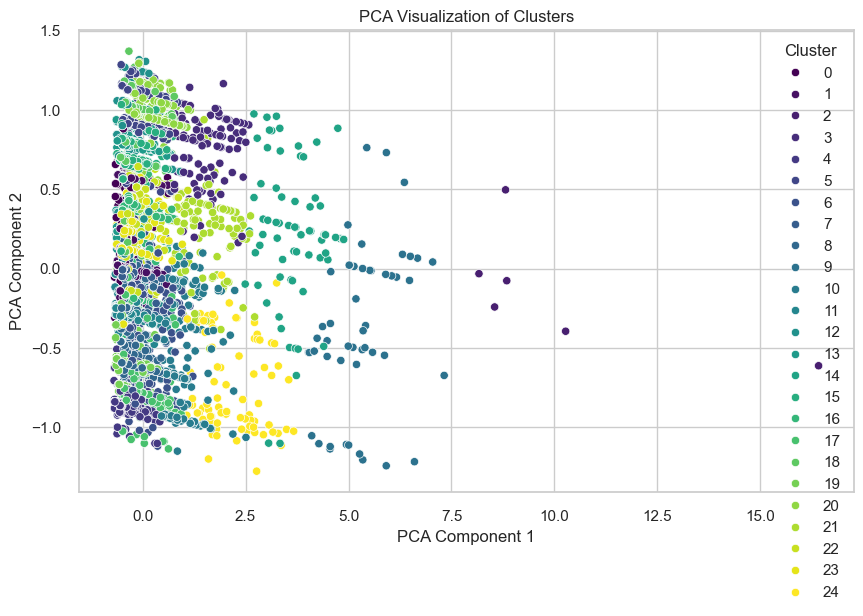

In [51]:
# Create a PCA model to reduce the dimensions to 2D
pca = PCA(n_components=2, random_state=42)

# Fit the PCA model to your data
pca_data = pca.fit_transform(encoded.drop('cluster_label', axis=1))

# Add the cluster labels to the PCA reduced data
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['cluster_label'] = encoded['cluster_label']

# Set style for seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot the clusters using PCA reduced data
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster_label', palette='viridis', legend='full')

plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

<hr><li><b>NOTE THAT THE CLUSTERS OF PCA and t-SNE DATASET ARE FULL OF COMPLEXITY AND TIGHTNESS</b></li>
<li>Three points can be drawn from the clusters:-</li>
<li>Overlap between clusters: There may be overlap between the clusters, meaning that data points from different clusters are located close to each other in the reduced 2D space. This could be due to similarities between data points in different clusters or noise in the data.</li>

<li>High-dimensional complexity: While PCA and t-SNE are useful for visualizing high-dimensional data, they may not always capture the full complexity of the data. In some cases, the inherent structure of the data may be difficult to represent accurately in just two dimensions.</li>

<li>Cluster tightness: The clusters may not be well-separated or tightly packed in the original feature space. In such cases, it may be challenging for dimensionality reduction techniques to reveal clear separation between clusters.</li>

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
